In [7]:
from google.colab.patches import cv2_imshow
import cv2
import numpy


def oilPainting(img, templateSize, bucketSize, step):  # templateSize模板大小,bucketSize桶阵列,step模板滑动步长

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = ((gray / 256) * bucketSize).astype(int)  # 灰度图在桶中的所属分区
    h, w = img.shape[:2]

    oilImg = numpy.zeros(img.shape, numpy.uint8)  # 用来存放过滤图像

    for i in range(0, h, step):

        top = i - templateSize
        bottom = i + templateSize + 1
        if top < 0:
            top = 0
        if bottom >= h:
            bottom = h - 1

        for j in range(0, w, step):

            left = j - templateSize
            right = j + templateSize + 1
            if left < 0:
                left = 0
            if right >= w:
                right = w - 1

            # 灰度等级统计
            buckets = numpy.zeros(bucketSize, numpy.uint8)  # 桶阵列，统计在各个桶中的灰度个数
            bucketsMean = [0, 0, 0]  # 对像素最多的桶，求其桶中所有像素的三通道颜色均值
            # 对模板进行遍历
            for c in range(top, bottom):
                for r in range(left, right):
                    buckets[gray[c, r]] += 1  # 模板内的像素依次投入到相应的桶中，有点像灰度直方图

            maxBucket = numpy.max(buckets)  # 找出像素最多的桶以及它的索引
            maxBucketIndex = numpy.argmax(buckets)

            for c in range(top, bottom):
                for r in range(left, right):
                    if gray[c, r] == maxBucketIndex:
                        bucketsMean += img[c, r]
            bucketsMean = (bucketsMean / maxBucket).astype(int)  # 三通道颜色均值

            # 油画图
            for m in range(step):
                for n in range(step):
                    oilImg[m + i, n + j] = (bucketsMean[0], bucketsMean[1], bucketsMean[2])
    return oilImg





In [14]:
img = cv2.imread(r'dream.jpg', cv2.IMREAD_ANYCOLOR)
oil = oilPainting(img, 4, 8, 2)


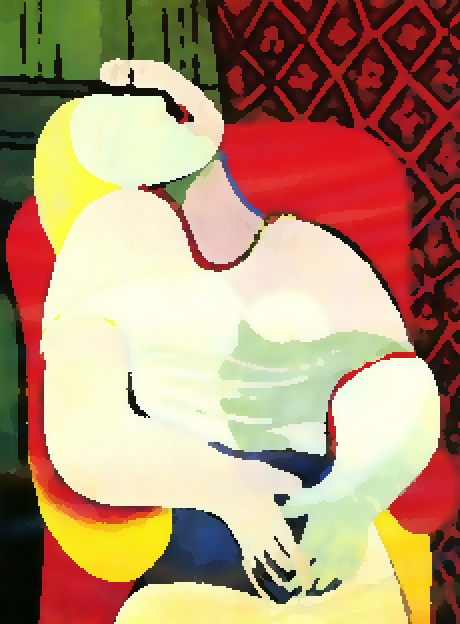

True

In [15]:
cv2_imshow(oil)
cv2.imwrite(r'oildream.jpg', oil)